<a href="https://colab.research.google.com/github/abrahammathews2000/Stellar_Components-TheGalaxy/blob/main/Code_stellar_components.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install regions

In [ ]:
import numpy as np
from scipy import constants
from scipy import special
from scipy import integrate
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

from astropy.io import ascii
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
from astropy.io import fits
#from regions import PixCoord, EllipsePixelRegion

# Constants
e = constants.e 
me = constants.m_e
c = constants.c
pi = math.pi

In [ ]:
data = ascii.read("https://raw.githubusercontent.com/abrahammathews2000/Dataset_for_Gcolab/main/Galaxy_Asg_2/download_Data_1.tsv")
#print(data)
GLON = np.array(data["GLON(deg)"])
GLAT = np.array(data["GLAT(deg)"])
OBcoord = SkyCoord(frame= "galactic",l = GLON,b = GLAT,unit=(u.deg, u.deg))

print(GLON)
print(GLAT)
print(OBcoord)

LMCcoord = SkyCoord(frame= "galactic",l = 280.4652,b = -32.8884,unit=(u.deg, u.deg))
SMCcoord = SkyCoord(frame= "galactic",l = 302.8084,b = -44.3277,unit=(u.deg, u.deg))
ANDROcoord = SkyCoord(frame= "galactic",l = 121.174329,b = -21.573309,unit=(u.deg, u.deg)) 

[117.32 117.01 116.98 ... 117.23 118.09 116.93]
[ 1.6   0.01 -0.14 ...  1.24  5.47 -0.29]
<SkyCoord (Galactic): (l, b) in deg
    [(117.32,  1.6 ), (117.01,  0.01), (116.98, -0.14), ...,
     (117.23,  1.24), (118.09,  5.47), (116.93, -0.29)]>


<ipython-input-20-50460071d558>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


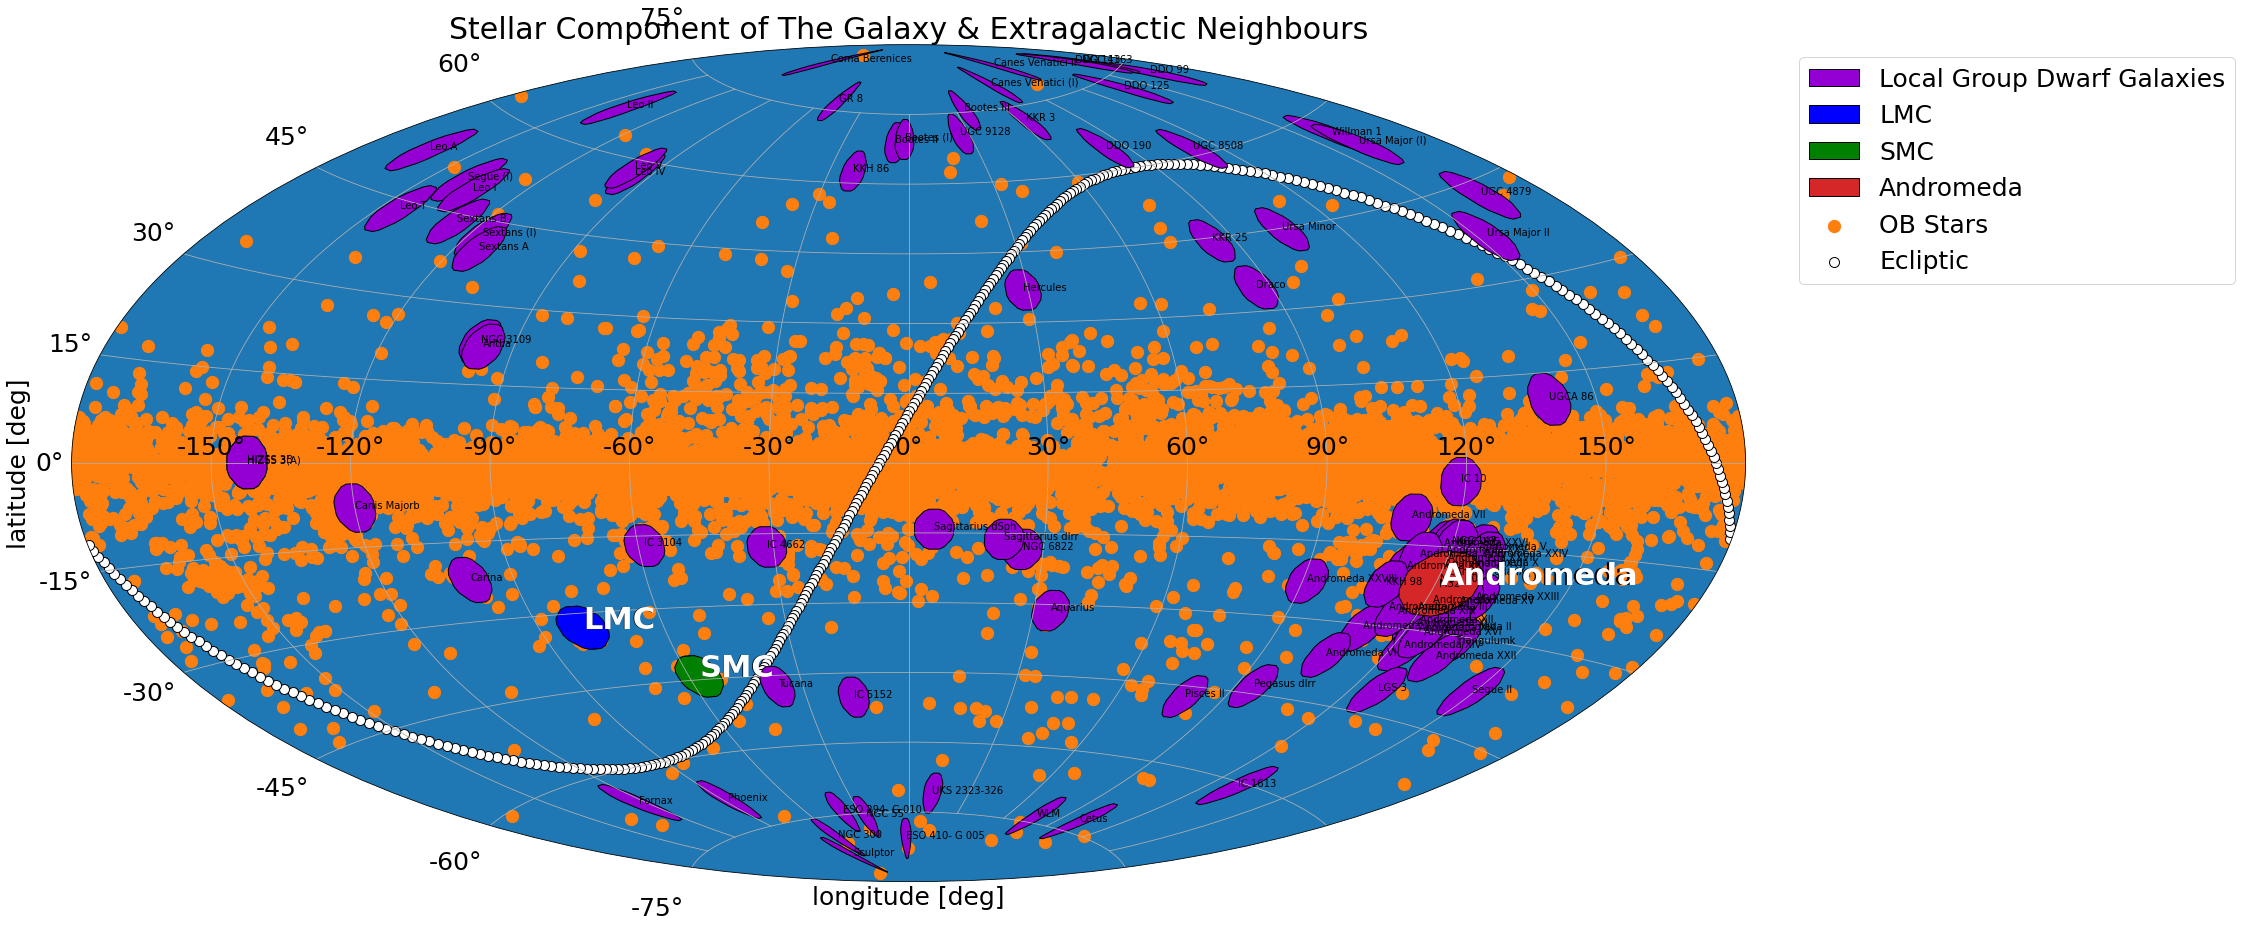

In [ ]:
plt.figure(figsize=(30,30))
plt.rcParams.update({'font.size': 25})
plt.subplot(projection="aitoff")
ax = plt.axes() 
ax.set_facecolor('tab:blue') 
plt.title("Stellar Component of The Galaxy & Extragalactic Neighbours")
plt.grid(True)
plt.scatter(OBcoord.l.wrap_at('180d').radian,OBcoord.b.radian,label="OB Stars",s=150,color = "tab:orange")
#plt.scatter(LMCcoord.l.wrap_at('180d').radian,LMCcoord.b.radian,s = 400,label="LMC",edgecolors='black')
#plt.scatter(SMCcoord.l.wrap_at('180d').radian,SMCcoord.b.radian,s = 400,label="SMC",edgecolors='black')
#plt.scatter(ANDROcoord.l.wrap_at('180d').radian,ANDROcoord.b.radian,s = 400,label="Andromeda",edgecolors='black')

'''
plt.gca().add_patch(LMCellipse)
plt.gca().add_patch(SMCellipse)
plt.gca().add_patch(ANDROellipse)
'''
#reg = EllipsePixelRegion(PixCoord(15, 10), width=16, height=10,angle=Angle(30, 'deg'))
#patch = reg.plot(ax=ax, facecolor='none', edgecolor='red', lw=2,label='Ellipse')



locGal = ascii.read("https://raw.githubusercontent.com/abrahammathews2000/Dataset_for_Gcolab/main/Galaxy_Asg_2/Table_2_analysis_Gal_Asg_2%20-%20v2.csv")
#print(locGal)
locGalNAME = np.array(locGal["Galaxy"])
locGalLON = np.array(locGal["l"])
locGalLAT = np.array(locGal["b"])
locGalcoord = SkyCoord(frame= "galactic",l = locGalLON,b = locGalLAT,unit=(u.deg, u.deg))
#plt.scatter(locGalcoord.l.wrap_at('180d').radian,locGalcoord.b.radian,label="Local Group")

#print("locGalcoord = ",locGalcoord[2].l)

i = 0
for i in np.arange(len(locGalLON)):
    if (i == 1):
        tempLocalGal = Ellipse((locGalcoord[i].l.wrap_at('180d').radian,locGalcoord[i].b.radian),width = 0.15,height=0.15,facecolor="darkviolet",edgecolor='black',label="Local Group Dwarf Galaxies")
    else:
        tempLocalGal = Ellipse((locGalcoord[i].l.wrap_at('180d').radian,locGalcoord[i].b.radian),width = 0.15,height=0.15,facecolor="darkviolet",edgecolor='black')
    plt.gca().add_patch(tempLocalGal)
    if(locGalNAME[i] == "LMC" or locGalNAME[i] == "SMC" or locGalNAME[i] == "Andromeda"):
        plt.text(locGalcoord[i].l.wrap_at('180d').radian, locGalcoord[i].b.radian, f'{locGalNAME[i]}', fontsize = 30,color='black',fontweight = "black")
    else:
        plt.text(locGalcoord[i].l.wrap_at('180d').radian, locGalcoord[i].b.radian, f'{locGalNAME[i]}', fontsize = 10,color='black')
       
i = 0
for i in np.arange(len(locGalLON)):
    if(locGalNAME[i] == "LMC" or locGalNAME[i] == "SMC" or locGalNAME[i] == "Andromeda"):
        plt.text(locGalcoord[i].l.wrap_at('180d').radian, locGalcoord[i].b.radian, f'{locGalNAME[i]}', fontsize = 30.5,color='white',fontweight = "black")
LMCellipse = Ellipse((LMCcoord.l.wrap_at('180d').radian,LMCcoord.b.radian),width = 0.2,height=0.15,label="LMC",facecolor = "blue",edgecolor='black')
SMCellipse = Ellipse((SMCcoord.l.wrap_at('180d').radian,SMCcoord.b.radian),width = 0.2,height=0.15,label="SMC",facecolor = "green",edgecolor='black')
ANDROellipse = Ellipse((ANDROcoord.l.wrap_at('180d').radian,ANDROcoord.b.radian),width = 0.3,height=0.2,label="Andromeda",facecolor = "tab:red",edgecolor='black')
plt.gca().add_patch(LMCellipse)
plt.gca().add_patch(SMCellipse)
plt.gca().add_patch(ANDROellipse)

eclipticLong = np.linspace(-180,180,361)
eclipticLat = np.zeros(len(eclipticLong))
#print(eclipticLong)
#print("Lat",eclipticLat)

eclipticCoord = SkyCoord(eclipticLong,eclipticLat, unit=u.deg,frame='barycentricmeanecliptic')
eclipticCoord_gal = eclipticCoord.transform_to('galactic')
plt.scatter(-eclipticCoord_gal.l.wrap_at('180d').radian,eclipticCoord_gal.b.radian,label="Ecliptic",s=100,color = "white",edgecolors='black')
#plt.plot(-eclipticCoord_gal.l.wrap_at('180d').radian,eclipticCoord_gal.b.radian,label="Ecliptic",color = "white")

plt.xlabel("longitude [deg]")
plt.ylabel("latitude [deg]")
plt.legend(bbox_to_anchor=(1.3, 1.0),loc='upper right')
plt.show()


In [ ]:
'''
eclipticLong = np.linspace(-180,180,361)
eclipticLat = np.zeros(len(eclipticLong))
#print(eclipticLong)
#print("Lat",eclipticLat)

eclipticCoord = SkyCoord(eclipticLong,eclipticLat, unit=u.deg,frame='barycentricmeanecliptic')
eclipticCoord_gal = eclipticCoord.transform_to('galactic')
plt.scatter(eclipticCoord_gal.l.wrap_at('180d').radian,eclipticCoord_gal.b.radian,label="Bright Stars",color = "tab:orange")
'''